In [21]:
import pandas as pd
import requests 
import json 
import csv 
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB

df_p = pd.read_csv('../data/askphilosophy.csv', index_col=0)
df_c = pd.read_csv('../data/changemyview.csv', index_col=0)

df_c['title'] =  df_c['title'].replace(to_replace ='CMV: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='CMC: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='Cmv: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='cmv: ', value = '', regex = True)

df = df_c.append(df_p)

# df['subreddit'] = df['subreddit'].replace({'askphilosophy':0, 'changemyview': 1})
df['subreddit'] = df['subreddit'].replace({'askphilosophy':1, 'changemyview': 0})

X = df['title']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [24]:
lemmatizer = WordNetLemmatizer()
def split_lemmatize(text):
    text_lower = text.lower()
    lemmatizer = WordNetLemmatizer()
    return " ".join([ lemmatizer.lemmatize(x)  for x in text_lower.split()])

In [25]:
pipe =make_pipeline(CountVectorizer(preprocessor=split_lemmatize,  max_features=100), 
                    MultinomialNB())

In [26]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=100,
                                 preprocessor=<function split_lemmatize at 0x7f7f4c2b4820>)),
                ('multinomialnb', MultinomialNB())])

In [27]:
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)
print(f" Train Score : {train_score}")
print(f" Train Score : {test_score}")

 Train Score : 0.8371859296482412
 Train Score : 0.8277386934673366


In [28]:
predics = gs.predict(X_test)

In [29]:
tn, fp, fn,tp = confusion_matrix(y_test, predics).ravel()
print(tn, fp, fn,tp)

1216 1280 131 2348


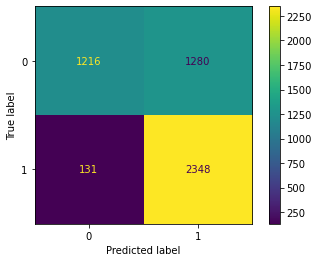

In [30]:
plot_confusion_matrix(gs, X_test,  y_test)

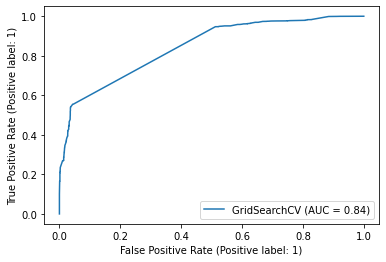

In [31]:
plot_roc_curve(gs, X_test, y_test);

In [32]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
ac = accuracy_score(y_test, predics)
fpr = fp / (fp+tn) # False Positive Rate 
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" Specificity: {recall}")
print(f" Balanced Accuracy: {balanced_accuracy}")
print(f" Accuracy Score: {ac}")
print(f" False Positive Rate : {fpr}")

 Precision: 0.6471885336273429
 Recall: 0.9471561113352158
 Specificity: 0.9471561113352158
 Balanced Accuracy: 0.7171677992573515
 Accuracy Score: 0.7163819095477387
 False Positive Rate : 0.5128205128205128
